# Análisis de variables categóricas o relación entre variables categóricas

Al igual que con las variables numéricas, vamos a plantear una serie de preguntas para aprender a usar este tipo de gráficas. Las preguntas son:


- ¿Cuál es el nivel educativo (`education`) más común? Con esta pregunta podremos saber que perfil educativo domina más entre nuestros clientes. 


- ¿Depende el nivel educativo de los clientes en que acepten o no una oferta (`y`)? En este caso podríamos ver que tipo de clientes aceptan o no la oferta. 


- ¿Depende el hecho de haber aceptado o no una oferta en el pasado (`poutcome`) en que acepten o no una oferta (`y`)? En este caso podríamos ver que tipo de clientes aceptan o no la oferta. 



## Countplot

Es una visualización específica que se utiliza para mostrar la frecuencia de observaciones en diferentes categorías. Este tipo de gráfico es especialmente útil cuando deseas contar y comparar cuántas veces aparece cada categoría en una variable categórica. 

La sintaxis del `countplot` de Seaborn es bastante sencilla. Aquí tienes la estructura básica:

```python
sns.countplot(x, data, palette, color, hue, orient)
```


In [1]:
# primero nuestras librerias!

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd

# Visualización
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

In [2]:
# lo primero que hacemos es cargar el dataframe que vamos a usar para esta lección
df = pd.read_csv("bank-additional-clean-nonulls.csv") 

In [3]:
# recordamos el DataFrame
df.head(2)

,income,kidhome,teenhome,dt_customer,numwebvisitsmonth,id,job,marital,education,default,housing,loan,contact,duration,campaign,previous,poutcome,empvarrate,conspriceidx,consconfidx,nremployed,y,date,latitude,longitude,contact_month,contact_year,age_cat,hijos_totales,age,euribor3m,pdays
0,161770.0,1.0,0.0,2012-04-04,29.0,089b39d8-e4d0-461b-87d4-814d71e0e079,housemaid,married,basic 4y,No,No,No,telephone,261,1,0,nonexistent,1.1,93.994,-36.4,5191,no,2-agosto-2019,41.495,-71.233,agosto,2019.0,Adultos mayores,1.0 hijos,40.005436,4.857000,4.4
1,85477.0,1.0,1.0,2012-12-30,7.0,e9d37224-cb6f-4942-98d7-46672963d097,services,married,high school,No,No,No,telephone,149,1,0,nonexistent,1.1,93.994,-36.4,5191,no,14-septiembre-2016,34.601,-83.923,septiembre,2016.0,Mediana edad,2.0 hijos,57.000000,3.603174,4.8


Para empezar a familiarizarnos con este tipo de gráfica vamos a contestar a la siguiente pregunta: 

> ¿Cuál es el nivel educativo (`education`) más común? Con esta pregunta podremos saber que perfil educativo domina más entre nuestros clientes. 

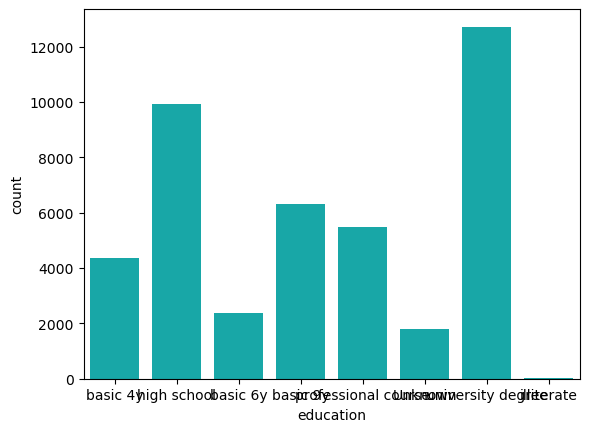

In [4]:
# creamos una primera gráfica usando el método 'sns.countplot()' 
# en este caso vemos que hay algunas cosas que se podrían cambiar, como por ejemplo que nombres de los distintos niveles de educación no se leen
# o por ejemplo podríamos querer que las barras estén ordenadas de mayor a menor. 
sns.countplot(x = "education", 
              data = df, 
              color = "c");

In [5]:
df["education"].unique()

array(['basic 4y', 'high school', 'basic 6y', 'basic 9y',
       'professional course', 'Unknown', 'university degree',
       'illiterate'], dtype=object)

Lo primero que vamos a hacer es rotar las etiquetas del eje x, para que las podamos leer mejor. Para usaremos el método `plt.xticks()`.  Se utiliza para personalizar las marcas (etiquetas) en el eje X de un gráfico. Entre otras cosas, permite especificar las ubicaciones y las etiquetas que deseamos mostrar en el eje X. Esto es útil cuando deseas ajustar cómo se muestran los valores en el eje X para que sean más legibles o para resaltar ciertas categorías. También nos puede ayudar a rotar las etiquetas, lo cual es nuestro objetivo. 

La sintaxis básica de `plt.xticks()` es la siguiente:

```python
# en caso de que estemos trabajando con gráficas individuales
plt.xticks(ticks, labels, rotation) # para modific9ar el eje x
plt.yticks(ticks, labels, rotation) # para modificar el eje y

# al igual que en los otros métodos, cuando queremos incluirlo en subplots es un poco diferente, en este caso usaremos:
axes[n].set_xticks()
axes[n].set_yticks()
```
Donde: 

- `ticks`: Es una lista o array que contiene las posiciones en el eje X donde deseas colocar las marcas. Pueden ser números que representen las ubicaciones de las categorías.

- `labels`: Es una lista o array que contiene las etiquetas que deseas mostrar en las marcas del eje X, correspondientes a las posiciones especificadas en `ticks`.

- `rotation`: Valor numérico que representa el ángulo de rotación en grados de las etiquetas. Puedes usar valores positivos (rotación en sentido de las agujas del reloj) o negativos (rotación en sentido contrario a las agujas del reloj).


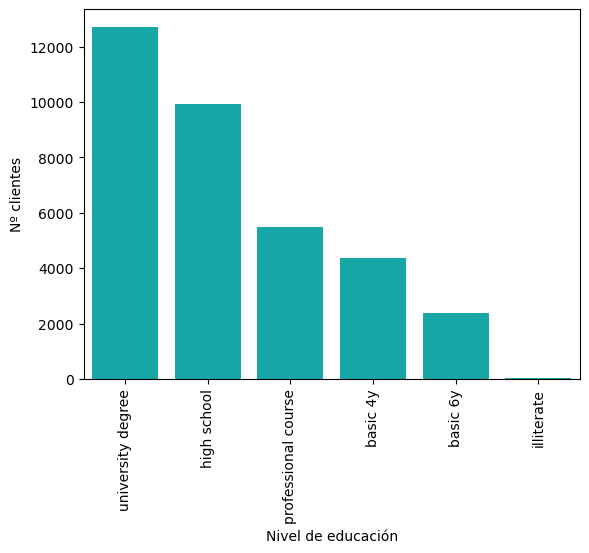

In [6]:
# volvemos a construir la gráfica usando un 'sns.countplot()'
# en este caso hemos añadido el parámetro 'order' para ordenar el nombre de las etiquetas y que aparezcan las barras de mayor cantidad a menor. 
sns.countplot(x = "education", 
              data = df,
              color = "c", 
              order = ['university degree', 'high school', 'professional course', 'basic 4y', 'basic 6y', 'illiterate'])

# giramos las etiquetas del eje "x", en este caso a 90º. En este caso solo vamos a usar el parámetro 'rotation', 
# más adelante veremos mas ejemplos para usar los otros parámetros. 
plt.xticks(rotation = 90)

# cambiamos el nombre de los ejes usando los métodos 'plt.ylabel()' y 'plt.xlabel()' ya que estamos creando solo una gráfica
plt.xlabel("Nivel de educación")
plt.ylabel("Nº clientes");

**¿Cómo interpretamos esta gráfica?**

Esta tal vez sea la gráfica con la que más familiarizadas estaremos. Lo que hace esta gráfica es contar el número de veces que aparece cada una de las categorías en el *DataFrame*. Es decir, es como un value_counts(), pero en una gráfica. En este caso vemos, que la mayoría de los clientes tienen un grado universitario, seguidos de los clientes que tienen estudios hasta el instituto. 

Para ver esto vamos a contestar a la siguiente pregunta:

> ¿Depende el nivel educativo de los clientes en que acepten o no una oferta (`y`)? En este caso podríamos ver que tipo de clientes aceptan o no la oferta. 


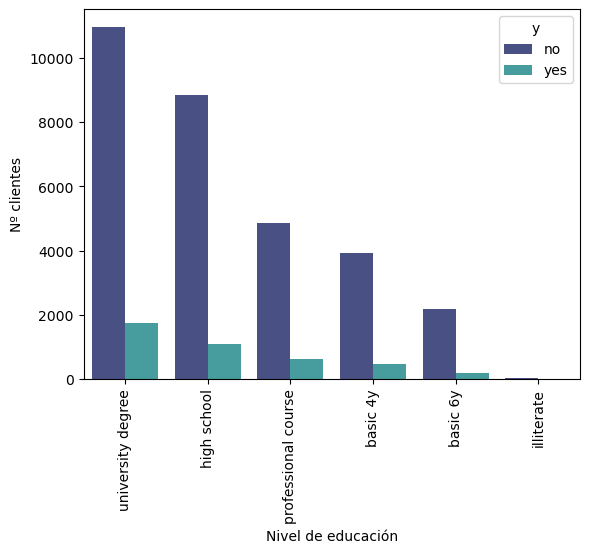

In [7]:
# para hacer esta gráfica vamos a reutilizar el código que hicimos para la gráfica anterior y le vamos a añadir el parámetro 'hue' en el 'sns.countplot()'
# 📌 fijaos como hemos añadido el parámetro hue en el código
# 
sns.countplot(x = "education", 
              data = df, 
              palette = "mako", 
              order = ['university degree', 'high school', 'professional course', 'basic 4y', 'basic 6y', 'illiterate'], 
              hue = "y")

# giramos las etiquetas del eje "x",  
plt.xticks(rotation = 90)

# cambiamos el nombre de los ejes usando los métodos 'plt.ylabel()' y 'plt.xlabel()'
plt.xlabel("Nivel de educación")
plt.ylabel("Nº clientes"); 

**¿Cómo interpretamos la gráfica?** 

Igual que la gráfica sin `hue` la hemos comparado con un *value_counts()*, esta gráfica la podemos comparar con un *groupby* en el cual agrupamos por dos variables. De la misma forma, nos esta diciendo cuantos clientes tengo por tipo de educación igual que teníamos en la gráfica anterior, solo que en este casi hemos añadido una categoría extra, que es si aceptan o no la oferta. En general vemos que, independiente del nivel educativo, se rechazan mas ofertas de las que se aceptan. 

Vamos a poner el último de los ejemplos de este tipo de gráfica. En este caso contestaremos a la pregunta: 

> ¿Depende el hecho de haber aceptado o no una oferta en el pasado (`poutcome`) en que acepten o no una oferta (`y`)? En este caso podríamos ver que tipo de clientes aceptan o no la oferta. 

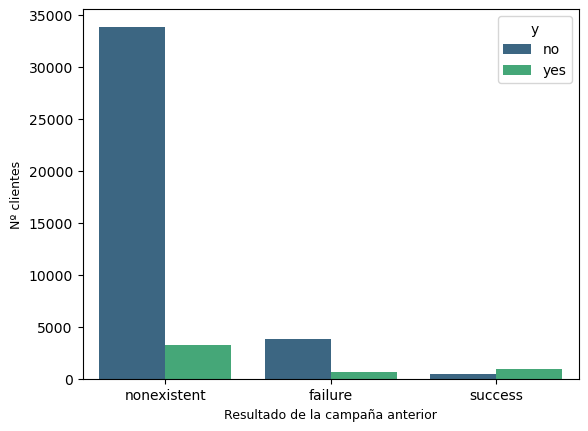

In [8]:
# para hacer esta gráfica vamos a reutilizar el código que hicimos para la gráfica anterior y le vamos a añadir el parámetro 'hue' en el 'sns.countplot()'
# 📌 fijaos como hemos añadido el parámetro hue en el código
# 
sns.countplot(x = "poutcome", 
              data = df, 
              palette = "viridis", 
              hue = "y")

# cambiamos el nombre de los ejes usando los métodos 'plt.ylabel()' y 'plt.xlabel()'
plt.xlabel("Resultado de la campaña anterior", fontsize = 9)
plt.ylabel("Nº clientes",  fontsize = 9); 

**¿Cómo interpretamos esta gráfica?**

En este caso vemos que los clientes que no aceptaron otras campañas de marketing (*nonexistent* y *failure*) no aceptaron en esta campaña de marketing. Mientras que en el caso de los que si aceptaron en otras campañas si que aceptaron más.

## Pieplot o Gráfico de quesitos

Es un tipo de gráfico utilizado para mostrar la proporción de diferentes partes en relación con un todo. Se representa como un círculo dividido en sectores, donde cada sector representa una categoría y su tamaño angular está en proporción a la cantidad que representa dentro del conjunto total.

Sintaxis básica de un pie chart utilizando la librería Matplotlib (**en seaborn no tenemos este tipo de gráfico**):

```python
plt.pie(valores, labels, autopct, startangle, data, colors)
```

> ¿Cuál es el nivel educativo (`education`) más común? Con esta pregunta podremos saber que perfil educativo domina más entre nuestros clientes.

In [9]:
df.head(1)

,income,kidhome,teenhome,dt_customer,numwebvisitsmonth,id,job,marital,education,default,housing,loan,contact,duration,campaign,previous,poutcome,empvarrate,conspriceidx,consconfidx,nremployed,y,date,latitude,longitude,contact_month,contact_year,age_cat,hijos_totales,age,euribor3m,pdays
0,161770.0,1.0,0.0,2012-04-04,29.0,089b39d8-e4d0-461b-87d4-814d71e0e079,housemaid,married,basic 4y,No,No,No,telephone,261,1,0,nonexistent,1.1,93.994,-36.4,5191,no,2-agosto-2019,41.495,-71.233,agosto,2019.0,Adultos mayores,1.0 hijos,40.005436,4.857,4.4


In [10]:
# empezamos preparando los datos para poder hacer el pieplot usando un groupby. En este caso tendremos que contar el número de clientes que tenemos por nivel educativo
df_educacion = df.groupby("education")["id"].count().reset_index()
df_educacion

,education,id
0,Unknown,1807
1,basic 4y,4356
2,basic 6y,2386
3,basic 9y,6309
4,high school,9925
5,illiterate,18
6,professional course,5477
7,university degree,12722


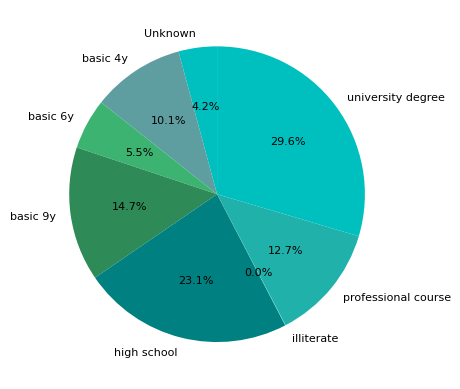

In [11]:
# lo primero que vamos a hacer es definir una lista para definir los colores que queremos para cada una de las categorías. 
# Esta lista debe tener tantos elementos como categorías tenemos en la columna de estudio (en este caso 7)
colores = ["c", "cadetblue", "mediumseagreen", "seagreen", "teal", "turquoise", "lightseagreen"]


# creamos el gráfico basándonos en el DataFrame que hemos creado en el paso anterior
plt.pie("id", labels= "education",
        data = df_educacion, 
        autopct=  '%1.1f%%', 
        colors = colores, 
        textprops={'fontsize': 8}, 
        startangle=90);

¿Qué es lo que significa eso que hemos puesto en el parámetro *autopct*?

- `'%'`: Este carácter es un literal que se traduce directamente a un signo de porcentaje (%) en la cadena formateada. Indica que el número formateado será seguido por un signo de porcentaje.

- `'1.1f'`: Especifica cómo se formateará el número. Aquí tienes una explicación más detallada:
  - `1`: El primer dígito en esta sección (antes del punto) indica el ancho mínimo total del campo. En este caso, significa que el campo tendrá al menos 1 carácter.

  - `.1`: La parte después del punto decimal indica cuántos dígitos después del punto decimal deben mostrarse. En este caso, solo se muestra un dígito después del punto decimal.

  - `f`: Indica que el número se formateará como un número de punto flotante.
 